Taken from : https://www.youtube.com/watch?v=L8Y2_Cq2X5s

## 1. What is TensorFlow ?

* TensorFlow is a deep learning library recently open-sourced by Google.
* TensorFlow provides primitves for defining functions on tensors and automatically computing their derivatives.

## 2. But what's a Tensor ?
* Formally, tensors are multilinear maps from vector spaces to the real numbers.
* A scalar is a tensor
* A vector is a tensor
* A matrix is a tensor
* Common to have fixed basis, so a tensor can be represented as a multidimensional array of numbers.

## 3. TensorFlow vs. Numpy
* Few people make this comparison, but TensorFlow and Numpy are quite similar. (Both are N-d array libraries!)
* Numpy has Ndarray support, but doesn't offer methods to create tensor functions and automatically compute derivatives (+ no GPU support).

## 4. Simple Numpy Recap 

In [74]:
import numpy as np

a= np.zeros((2,2))
b= np.ones((2,2))

np.sum(b,axis=1)

array([ 2.,  2.])

In [75]:
a.shape

(2, 2)

In [76]:
np.reshape(a,(1,4))

array([[ 0.,  0.,  0.,  0.]])

## 5. Repeat in TensorFlow

In [77]:
import tensorflow as tf

sess = tf.InteractiveSession()

a = tf.zeros((2,2))
b = tf.ones((2,2))

tf.reduce_sum(b,reduction_indices=1).eval()

a.get_shape()

tf.reshape(a, (1,4)).eval()

array([[ 0.,  0.,  0.,  0.]], dtype=float32)

## 6. TensorFlow requires explicit evaluation!
TensorFlow computations define a computation graph that has no numerical value until evaluated!

In [78]:
a = np.zeros((2,2))

ta = tf.zeros((2,2))

print(a)

[[ 0.  0.]
 [ 0.  0.]]


In [79]:
print(ta)

Tensor("zeros_12:0", shape=(2, 2), dtype=float32)


In [80]:
print(ta.eval())

[[ 0.  0.]
 [ 0.  0.]]


## 7. TensorFlow Session Object
* A session object encapsulates the environment in which Tensor objects are evaluated. 
* tf.InteractiveSession() is just convenient syntactic sugar for keeping a default session open in ipython.
* sess.run(c) is an example of a TensorFlow Fetch. 


In [81]:
a = tf.constant(5.0)
b = tf.constant(6.0)

c = a*b

with tf.Session() as sess:
    print sess.run(c)
    print c.eval()

30.0
30.0


Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x10c872450>> ignored


## 8. Tensorflow Computation Graph
* Tensorflow programs are usually structured into a construction phase, that assembles a graph, and an execution phase that uses a session to execute ops in the graph
* All computatuons add nodes to global default graph

## 9. Tensorflow Variables
* When you train a model you use variables to hold and update parameters. Variables are in memory buffers containing tensors.
* All tensors we've used previously have been constant tensors, not variables.

We previously printed a couple of constant variables but for tensorflow variables we cant do the same thing. We need to initalize them using tf.initialize_all_variables function.

In [82]:
W1 = tf.ones((2,2))
W2 = tf.Variable(tf.zeros((2,2)),name="weights")

with tf.Session() as sess:
    print(sess.run(W1))
    sess.run(tf.initialize_all_variables())
    print(sess.run(W2))

[[ 1.  1.]
 [ 1.  1.]]
[[ 0.  0.]
 [ 0.  0.]]


## 10. Updating Variable State

In [83]:
state = tf.Variable(0,name="counter")

new_value = tf.add(state,tf.constant(1)) # Roughly new_value = state + 1

update = tf.assign(state,new_value) # Roughly state = new_value

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print sess.run(state)
    for _ in range(3):
        sess.run(update)
        print sess.run(state)

0
1
2
3


## 11. Fetching Variable State
Calling sess.run(var) on a tf.Session() object retrieves its value. Can retrieve multiple variables simultaneously with sess.run([var1,var2])

In [84]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)

intermed =tf.add(input2,input3)
mul = tf.mul(input1,intermed)
with tf.Session() as sess:
    result = sess.run([mul,intermed])
    print(result)


[21.0, 7.0]


## 12. Inputting Data
* All previous examples have manually defined tensors. How can we input external data into TensorFlow?
* Simple solution: Import from Numpy:

In [85]:
a = np.zeros((3,3))
ta = tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(ta))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


## 13. Placeholders and Feed Dictionaries
* Inputting data with tf.convert_to_tensor() is convenient, but doesn't scale.
* Use tf.placeholder variables ( dummy nodes that provide entry points for data to computational graph)
* A feed_dict is a python dictionary mapping from tf.placeholder vars ( or their names) to data ( numpy arrays, lists, etc.)

In [86]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.mul(input1,input2)

with tf.Session() as sess:
    print sess.run([output],feed_dict={input1:[7.],input2:[2.]})

[array([ 14.], dtype=float32)]


## 14. Variable Scope
* Complicated Tensorflow models can have hundreds of variables
    * tf.variable_scope() provides simple name-spacing to avoid clashes
    * tf.get_variable() creates/accesses variables from within a variable scope

* Variable scope is a simple type of namespacing that adds prefixes to variable names within scope

In [ ]:
with tf.variable_scope("foo"):
    with tf.variable_scope("bar"):
        v = tf.get_variable("v",[1])

assert v.name == "foo/bar/v:0"

In [ ]:
with tf.variable_scope("foo"):
    x = tf.get_variable("x",[1])
    tf.get_variable_scope().reuse_variables()
    x1 = tf.get_variable("x",[1])
assert x1 == x

## 15. Understanding get_variable
* Behavior depends on whether variable reuse enabled   
   
* Case 1: reuse set to false
    * Create and return new variable

In [89]:
with tf.variable_scope("fooo"):
    v = tf.get_variable("v",[1])
assert v.name == "fooo/v:0"

* Case 2: Variable reuse set to true
    * Search for existing variable with given name. Raise ValueError if none found

In [90]:
with tf.variable_scope("foooo"):
    v = tf.get_variable("v",[1])
with tf.variable_scope("foooo",reuse=True):
    v1 = tf.get_variable("v",[1])
assert v1 == v

## 16. Linear Regression in Tensorflow

In [ ]:
%reset

/Users/halilakin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


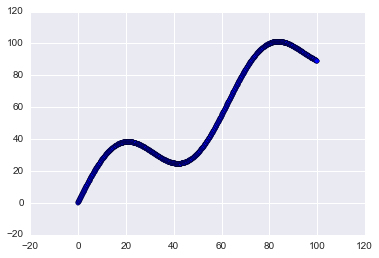

In [1]:
import tensorflow as tf
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

# Define input data
X_data = np.arange(100,step=.1)
y_data = X_data + 20 * np.sin(X_data/10)

# Plot input data
plt.scatter(X_data,y_data)

In [2]:
# Define data size and batch size
n_samples = 1000
batch_size = 100

# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data,(n_samples,1))
y_data = np.reshape(y_data,(n_samples,1))

# Define placeholders for input
X = tf.placeholder(tf.float32,shape=(batch_size,1))
y = tf.placeholder(tf.float32,shape=(batch_size,1))

In [3]:
# Define variables to be learned

with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights",(1,1),
                       initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias",(1,),
                       initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X,W) + b
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)

In [10]:
# Sample code to run one step of gradient descent

opt = tf.train.AdamOptimizer()

opt_operation = opt.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for i in range(500):
        indices = np.random.choice(n_samples,batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        _, loss_val = sess.run([opt_operation,loss],feed_dict={X:X_batch, y:y_batch})
        if i%100 ==0:
            print "Loss:",loss_val


Loss: 774.456
Loss: 729.146
Loss: 524.443
Loss: 518.733
Loss: 394.554


## 17. Tensorflow Gradient Computation
* Tensorflow nodes in computation graph have attached gradient operations.
* Use backpropagation to compute required gradients for all varialbes in graph

## 18. Tensorflow gotchas/debugging
* Convert tensors to numpy array and print
* Tensorflow is fastidious about types and shapes. Check that types/shapes of all tensors match
* Tensorflow api is less mature than numpy api. Many advanced numpy operations not supported yet.
* If you are stuck try making a pure numpy implementation of forward computation
* Then look for analog of each numpy function in tensorflow api
* Use tf.InteractiveSession() to experiment in the shell